In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.impute import KNNImputer
# from statsmodels.tsa.arima.model import ARIMA

In [ ]:
data_path = r"world_bank_data_dev80-23++.csv"

# Load dataset
df = pd.read_csv(data_path)

# Display basic info
print("Dataset Information:")
df.info()

Dataset Shape: (9636, 12)
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9636 entries, 0 to 9635
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       9636 non-null   object 
 1   date                          9636 non-null   object 
 2   GDPpc_2017$                   6655 non-null   float64
 3   Population_total              9626 non-null   float64
 4   Life_exectancy                9086 non-null   float64
 5   Literacy_rate                 1124 non-null   float64
 6   Unemploymlent_rate            6234 non-null   float64
 7   Energy_use                    4854 non-null   float64
 8   Fertility_rate                9085 non-null   float64
 9   Poverty_ratio                 1024 non-null   float64
 10  Primary_school_enrolmet_rate  7120 non-null   float64
 11  Exports_2017$                 5901 non-null   float64
dtypes: float64(10),

In [51]:
print("Dataset Shape:", df.shape)

Dataset Shape: (9636, 12)


In [5]:
# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


First 5 Rows:
  country        date   GDPpc_2017$  Population_total  Life_exectancy  \
0   Aruba  2023-01-01  40516.808563          107359.0             NaN   
1   Aruba  2022-01-01  38877.674436          107310.0          74.992   
2   Aruba  2021-01-01  35696.309372          107700.0          74.626   
3   Aruba  2020-01-01  28521.688852          108587.0          75.723   
4   Aruba  2019-01-01  38435.426913          109203.0          76.248   

   Literacy_rate  Unemploymlent_rate  Energy_use  Fertility_rate  \
0            NaN                 NaN         NaN             NaN   
1            NaN                 NaN         NaN           1.179   
2            NaN                 NaN         NaN           1.180   
3      97.989998                 NaN         NaN           1.325   
4            NaN                 NaN         NaN           1.486   

   Poverty_ratio  Primary_school_enrolmet_rate  Exports_2017$  
0            NaN                           NaN            NaN  
1        

In [11]:
print("\nCountries:")
countries=sorted(df['country'].unique())
print(len(countries))
for i in countries:
    print(i)


Countries:
219
Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt, Arab Rep.
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Faroe Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia, The
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong SAR, China
Hungary
Iceland
India
Indonesia
Iran, Islamic Rep.
Iraq
Ireland
Isle of Man
Israel
Italy
Jamaic

In [25]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


country                            0
date                               0
GDPpc_2017$                     2981
Population_total                  10
Life_exectancy                   550
Literacy_rate                   8512
Unemploymlent_rate              3402
Energy_use                      4782
Fertility_rate                   551
Poverty_ratio                   8612
Primary_school_enrolmet_rate    2516
Exports_2017$                   3735
dtype: int64

In [40]:
df['country'].groupby(df['country']).count()

country
Afghanistan              44
Albania                  44
Algeria                  44
American Samoa           44
Andorra                  44
                         ..
Virgin Islands (U.S.)    44
West Bank and Gaza       44
Yemen, Rep.              44
Zambia                   44
Zimbabwe                 44
Name: country, Length: 219, dtype: int64

In [54]:
print("Date:")
date_unique=sorted(df['date'].unique())
print(len(date_unique))
for i in date_unique:
    print(i)
print(date_unique[0],date_unique[-1])

\Date:
44
1980-01-01
1981-01-01
1982-01-01
1983-01-01
1984-01-01
1985-01-01
1986-01-01
1987-01-01
1988-01-01
1989-01-01
1990-01-01
1991-01-01
1992-01-01
1993-01-01
1994-01-01
1995-01-01
1996-01-01
1997-01-01
1998-01-01
1999-01-01
2000-01-01
2001-01-01
2002-01-01
2003-01-01
2004-01-01
2005-01-01
2006-01-01
2007-01-01
2008-01-01
2009-01-01
2010-01-01
2011-01-01
2012-01-01
2013-01-01
2014-01-01
2015-01-01
2016-01-01
2017-01-01
2018-01-01
2019-01-01
2020-01-01
2021-01-01
2022-01-01
2023-01-01
1980-01-01 2023-01-01


In [70]:
# Compute total recorded rows per country
total_rows_by_country = df.drop(columns=['date']).groupby('country').size()
total_rows_by_country = total_rows_by_country.to_frame(name="Total Rows")

# Compute total missing rows per country (if a row contains at least one NaN, count it as missing)
missing_rows_by_country = df.drop(columns=['date']).groupby('country').apply(lambda x: x.isnull().any(axis=1).sum())
missing_rows_by_country = missing_rows_by_country.to_frame(name="Total Missing Rows")

# Merge the two dataframes
missing_total_summary = total_rows_by_country.merge(missing_rows_by_country, left_index=True, right_index=True)
missing_total_summary['Total Non Missing Rows'] = missing_total_summary['Total Rows']-missing_total_summary['Total Missing Rows']


pd.set_option('display.max_rows', None)  # Show all rows
display(missing_total_summary)
pd.reset_option('display.max_rows')  # Reset back to default

print(missing_total_summary['Total Non Missing Rows'].sum())

C:\Users\tanbe\AppData\Local\Temp\ipykernel_31784\1686444454.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_rows_by_country = df.drop(columns=['date']).groupby('country').apply(lambda x: x.isnull().any(axis=1).sum())


,Total Rows,Total Missing Rows,Total Non Missing Rows
country,,,
Afghanistan,44,44,0
Albania,44,44,0
Algeria,44,44,0
American Samoa,44,44,0
Andorra,44,44,0
Angola,44,44,0
Antigua and Barbuda,44,44,0
Argentina,44,44,0
Armenia,44,44,0


95


In [59]:
# Sort by 'Total Non Missing Rows' in descending order and limit to 10 rows
missing_total_summary.sort_values(by="Total Non Missing Rows", ascending=False).head(10)

,Total Rows,Total Missing Rows,Total Non Missing Rows
country,,,
Spain,44,32,12
Ecuador,44,36,8
Paraguay,44,37,7
Honduras,44,38,6
Indonesia,44,38,6
Bolivia,44,38,6
Peru,44,38,6
Pakistan,44,39,5
Chile,44,41,3


In [68]:
# Group by country to check missing values
missing_by_country = df.drop(columns=['date']).groupby('country').apply(lambda x: x.isnull().sum())
missing_by_country = missing_by_country.drop(columns=['country'])

pd.set_option('display.max_rows', None)  # Show all rows
display(missing_by_country)
pd.reset_option('display.max_rows')  # Reset back to default

C:\Users\tanbe\AppData\Local\Temp\ipykernel_31784\3761668679.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_country = df.drop(columns=['date']).groupby('country').apply(lambda x: x.isnull().sum())


,GDPpc_2017$,Population_total,Life_exectancy,Literacy_rate,Unemploymlent_rate,Energy_use,Fertility_rate,Poverty_ratio,Primary_school_enrolmet_rate,Exports_2017$
country,,,,,,,,,,
Afghanistan,20,0,1,41,11,44,1,41,9,44
Albania,10,0,1,38,11,9,1,37,2,16
Algeria,10,0,1,39,11,9,1,43,0,0
American Samoa,44,0,44,43,44,44,44,44,33,23
Andorra,10,0,44,44,44,44,39,44,21,44
Angola,10,0,1,40,11,9,1,43,19,22
Antigua and Barbuda,10,0,1,43,44,39,1,44,27,43
Argentina,10,0,1,41,11,9,1,37,6,0
Armenia,10,0,1,38,11,19,1,40,11,14


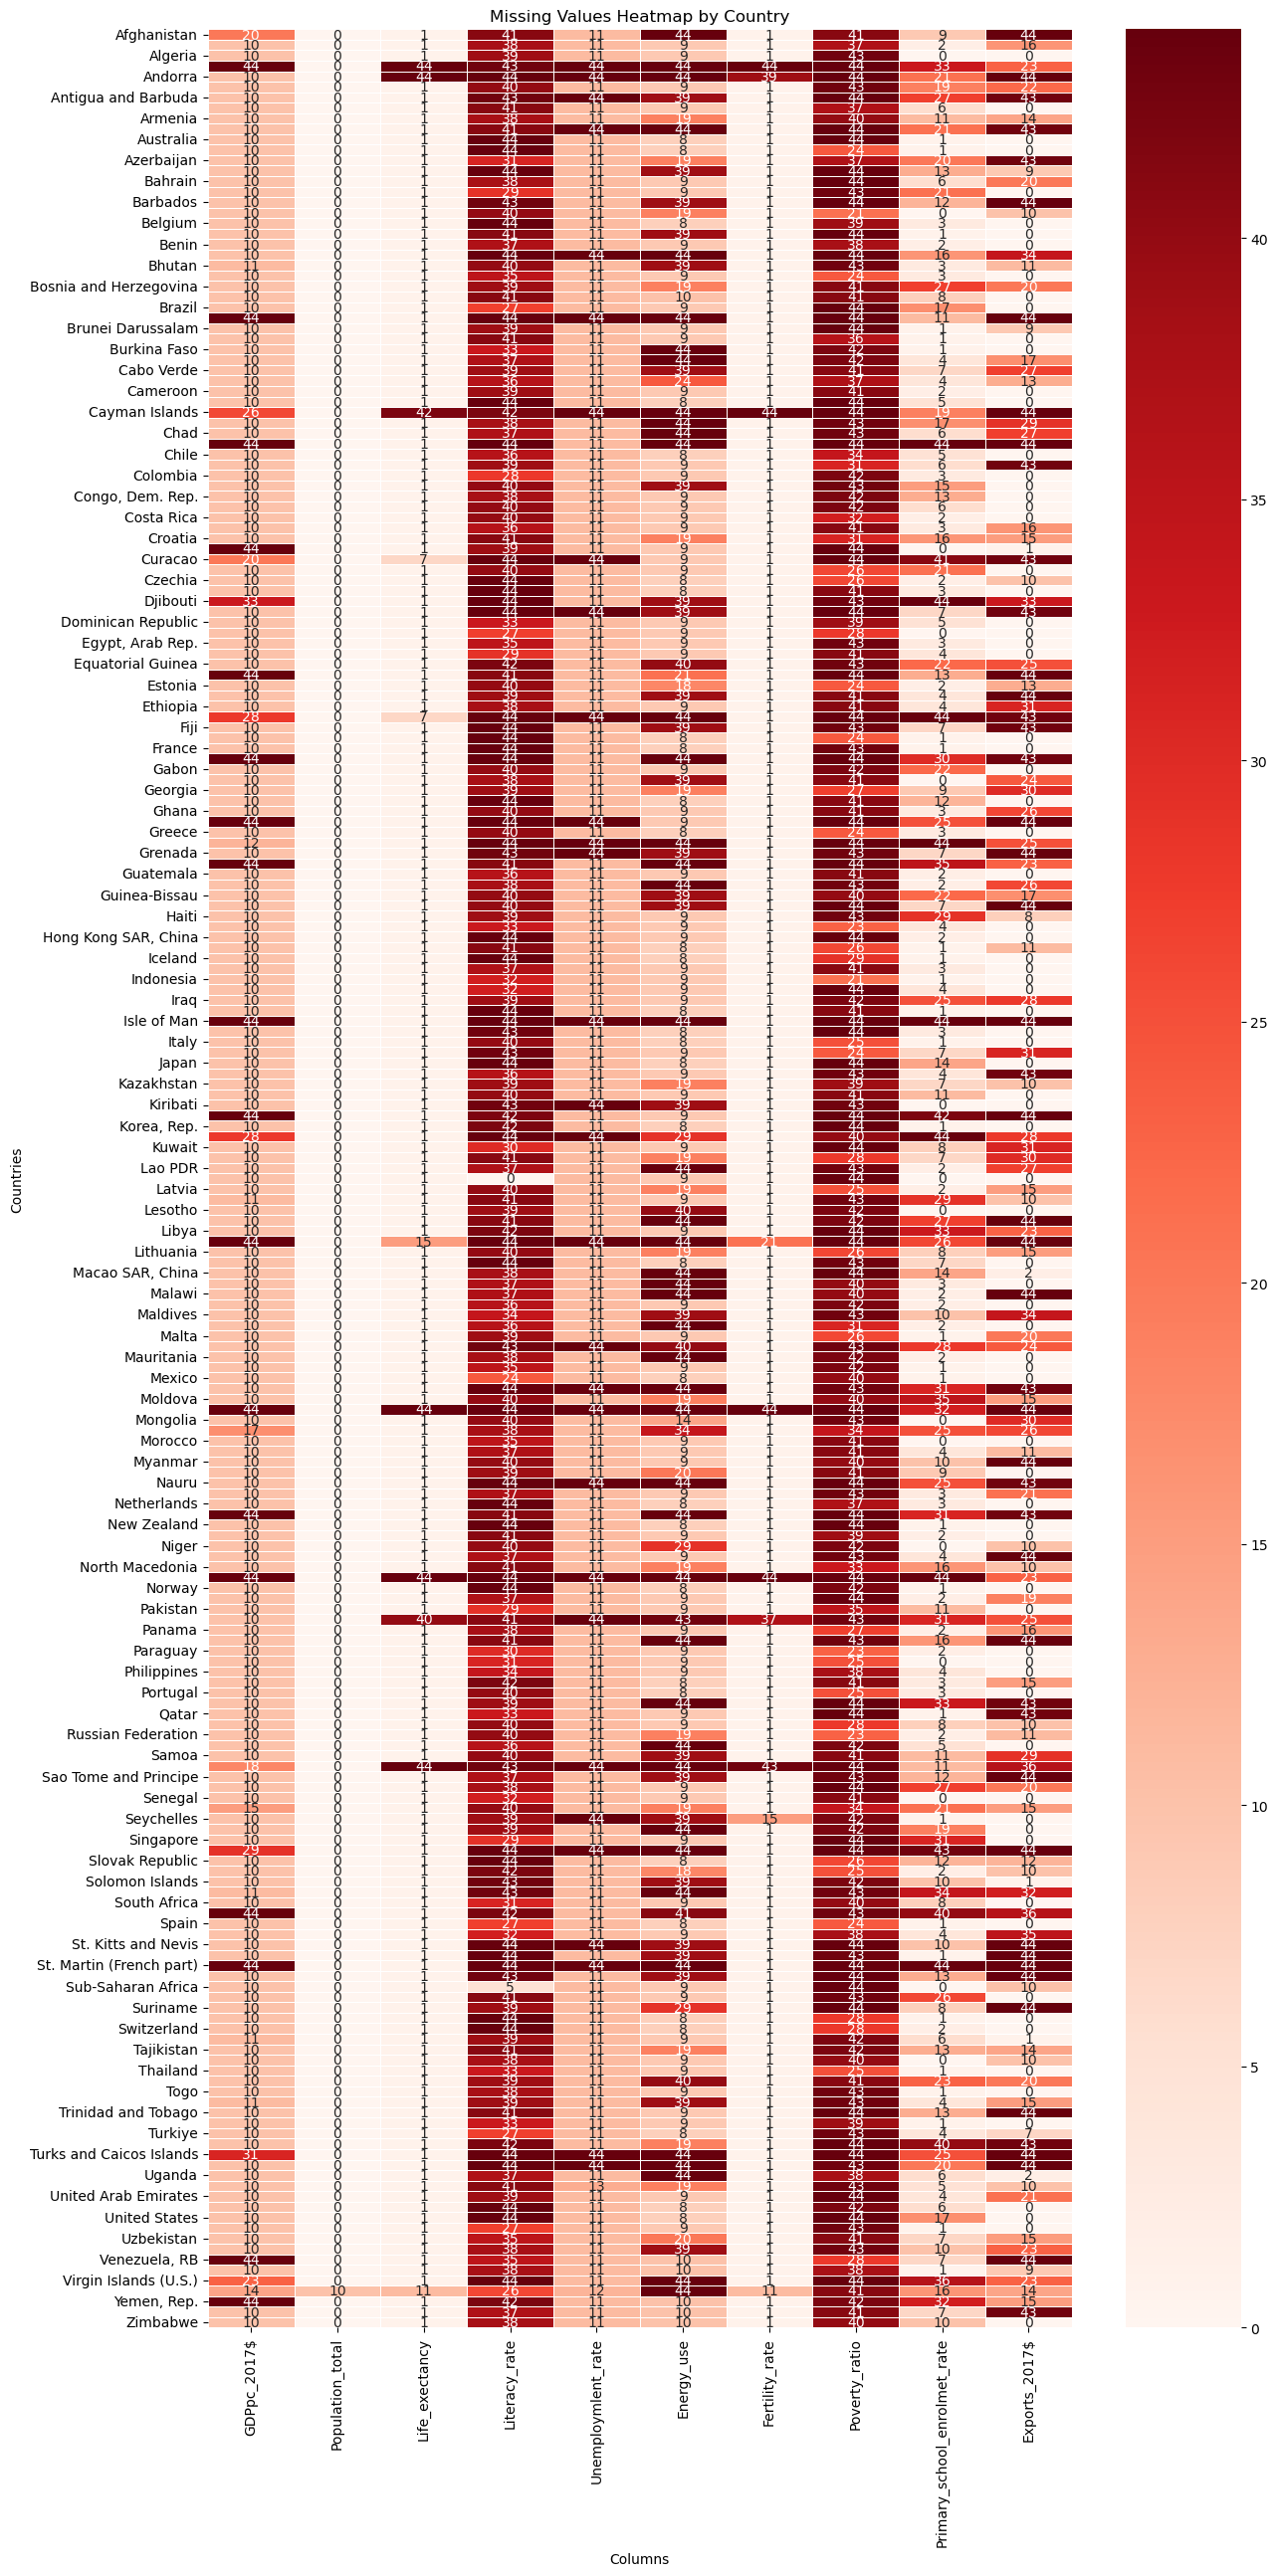

In [69]:
# Assuming the provided data is loaded as a DataFrame named df_missing_values
# df_missing_values = pd.read_clipboard()  # Load from clipboard (if copied from Excel or text)

# Convert all columns except 'country' to numeric, ensuring proper visualization
df_missing_values = missing_by_country.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(14, 30))  # Adjust figure size for better visibility
sns.heatmap(df_missing_values, cmap="Reds", annot=True, fmt="d", linewidths=0.5)

# Adjust labels and title
plt.xlabel("Columns")
plt.ylabel("Countries")
plt.title("Missing Values Heatmap by Country")

# Show the plot
plt.show()

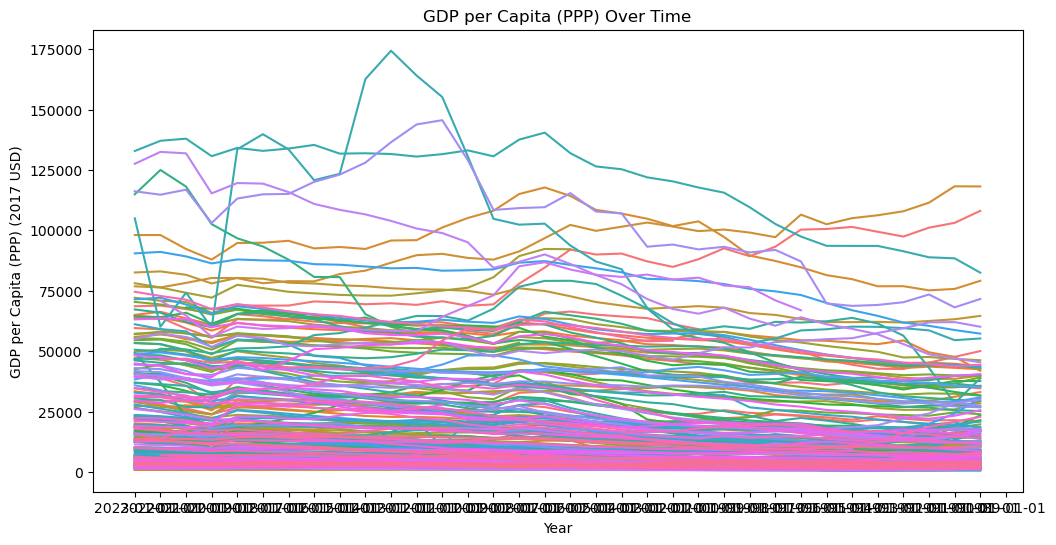

In [64]:

# Line plot of GDP over time (if GDP column exists)
if 'GDPpc_2017$' in df.columns and 'date' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='date', y='GDPpc_2017$', hue='country', legend=False)
    plt.title("GDP per Capita (PPP) Over Time")
    plt.xlabel("Year")
    plt.ylabel("GDP per Capita (PPP) (2017 USD)")
    plt.show()

# # Pairplot of selected indicators
# selected_cols = ['GDPpc_2017$', 'Life_exectancy', 'Unemploymlent_rate', 'Fertility_rate']
# df_subset = df[selected_cols].dropna()
# sns.pairplot(df_subset)
# plt.show()

# """
# Next Steps:
# - Handle missing values (imputation, dropping, etc.).
# - Further feature engineering (scaling, transformations, etc.).
# - Train ML models for clustering and forecasting.
# """


In [ ]:
# Apply Interpolation for Time-Series Data Imputation
df.interpolate(method='linear', inplace=True)

# Apply KNN Imputer for Missing Data
knn_imputer = KNNImputer(n_neighbors=3, weights='uniform')
df.iloc[:, 2:] = knn_imputer.fit_transform(df.iloc[:, 2:])

# Apply ARIMA for GDP Imputation
if 'GDPpc_2017$' in df.columns:
    for country in df['country'].unique():
        country_data = df[df['country'] == country].copy()
        if country_data['GDPpc_2017$'].isnull().sum() > 0:
            model = ARIMA(country_data['GDPpc_2017$'].dropna(), order=(5,1,0))
            model_fit = model.fit()
            predicted_values = model_fit.predict(start=len(country_data.dropna()),
                                                 end=len(country_data)-1)
            df.loc[df['country'] == country, 'GDPpc_2017$'] = df.loc[df['country'] == country, 'GDPpc_2017$'].fillna(predicted_values.mean())

# Summary statistics after imputation
print("\nSummary Statistics After Imputation:")
print(df.describe())

# Visualize missing values after imputation
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap After Imputation")
plt.show()